In [1]:
import numpy as np
import pylab as pl
from scipy.stats import hypergeom

In [2]:
population_germany = 83839732

In [3]:
# approximate prevalence of respiratory disease i the total population
# (i.e. would make you "eligible" to be randomely selected) 
# this number is a TOTAL GUESS, I didnt bother to find data
prevalence_respiratory_disease = 0.05

In [5]:
# relevant population size for the random picking
population_for_random_screening = int(np.ceil(prevalence_respiratory_disease*population_germany))
print(population_for_random_screening)

4191987


In [10]:
# approximate number of active cases at any gven time during the relevant random picking period
# this number is a TOTAL GUESS, I didnt bother to find data
active_case_covid = 16581

In [11]:
# average ratio of active cases to total population
prevalence_covid = active_case_covid/population_germany
print('{:.3f} %'.format(100*prevalence_covid))

0.020 %


In [12]:
# assuming same distribution of covid in people with respiratory_disease and without
active_case_covid_with_respiratory_disease = int(np.ceil(prevalence_covid*population_for_random_screening))
print(active_case_covid_with_respiratory_disease)

830


In [14]:
# number of random selection without replacement in the pool of "respiratory_disease"
N_trial = 3*100*7

In [15]:
# distribution of number of covid case in the trial follows hypergeometric distribution
discovery_distribution = hypergeom(population_for_random_screening, active_case_covid_with_respiratory_disease, N_trial)

In [16]:
x = np.arange(0, active_case_covid_with_respiratory_disease+1)
pmf = discovery_distribution.pmf(x)

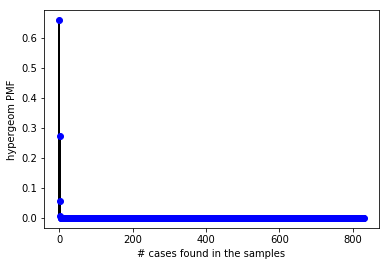

In [17]:
fig = pl.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf, 'bo')
ax.vlines(x, 0, pmf, lw=2)
ax.set_xlabel('# cases found in the samples')
ax.set_ylabel('hypergeom PMF')
pl.show()

In [24]:
ii=11
for i in range(ii):
    print('Probability of finding EXACTLY {} cases is {:.10f}%'.format(i, 100*discovery_distribution.pmf(i)))
    
print('Probability of finding {} OR MORE cases is {:.10f}%'.format(ii, 100*(1-(discovery_distribution.pmf(range(ii))).sum())))

Probability of finding EXACTLY 0 cases is 65.9720777003%
Probability of finding EXACTLY 1 cases is 27.4499259308%
Probability of finding EXACTLY 2 cases is 5.7011395680%
Probability of finding EXACTLY 3 cases is 0.7880606832%
Probability of finding EXACTLY 4 cases is 0.0815618227%
Probability of finding EXACTLY 5 cases is 0.0067417316%
Probability of finding EXACTLY 6 cases is 0.0004635977%
Probability of finding EXACTLY 7 cases is 0.0000272791%
Probability of finding EXACTLY 8 cases is 0.0000014021%
Probability of finding EXACTLY 9 cases is 0.0000000640%
Probability of finding EXACTLY 10 cases is 0.0000000026%
Probability of finding 11 OR MORE cases is 0.0000002179%
